# **2022 MLB batting stats ([Baseball Reference](https://www.baseball-reference.com/)) and ([Savant](https://baseballsavant.mlb.com/))**

- tm: MLB Team
- lg: American League or National League
- g: games played
- pa: plate apparences
- ab: At bat
- r: Runs
- h: hits 
- 2b: double base
- 3b: Triple base
- HR: Home Runs 
- RBI: Runs Batted In
- SB: Stolen Bases
- CS: Caught Stealing
- BB: Bases on Balls/Walks
- SO:  Strikeouts
- BA:  Hits/At Bats
- OBP: On-base percentage
- SLG: Slugging(calculated by dividing the total number of bases by the number of at bats)
- OPS: On-base plus slugging(combine how well a hitter can reach base)
- OPS+: player's on-base plus slugging percentage and normalizes the number across the entire league
- TB: Total Bases
- HBP: Times Hit by a Pitch.
- **Advanced Stats(Savant):**
- k_percent: Percentage of all plate appearances ending with a Strikeout
- exit_velocity_avg: Average speed of the ball off the bat for balls put into play, measured in miles per hour
- hard_hit_percent: Percent of balls in play with an exit velocity of 95 mph or more
- pitch_count: Total pitches
- Whiff %: This metric calculates the percentage of swings that result in a miss by the hitter
- ISO: Isolated Power, batter's raw power by focusing on their ability to hit for extra bases, specifically extra-base hits (doubles, triples, and home runs)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

baseball_sp1 = pd.read_csv('baseball.csv')
baseball_sp1.drop('Rk', axis=1, inplace=True)
baseball_sp1.columns = map(str.lower, baseball_sp1.columns)

baseball_sp = baseball_sp1[baseball_sp1['tm'] != 'TOT'].copy()
baseball_sp.reset_index(drop=True, inplace=True)
baseball_sp['name'] = baseball_sp['name'].str.replace(r'[#*.]+$', '', regex=True)
baseball_sp.head()



,name,age,tm,lg,g,pa,ab,r,h,2b,...,ops,ops+,tb,gdp,hbp,sh,sf,ibb,pos summary,name-additional
0,CJ Abrams,21,SDP,NL,46,139,125,16,29,5,...,0.605,76.0,40,4,6,2,2,0,64/H9D,abramcj01
1,CJ Abrams,21,WSN,NL,44,163,159,17,41,7,...,0.603,75.0,52,1,3,0,0,0,6/H,abramcj01
2,Albert Abreu,26,KCR,AL,1,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01
3,José Abreu,35,CHW,AL,157,679,601,85,183,40,...,0.824,133.0,268,19,12,0,4,2,*3D,abreujo02
4,Ronald Acuna Jr,24,ATL,NL,119,533,467,71,124,24,...,0.764,112.0,193,8,10,0,3,4,9D/H8,acunaro01


## The average Age is **28** 

In [5]:
average_age = baseball_sp['age'].mean()
average_age_rounded = round(average_age, 1)
print("The average age is " + str(average_age_rounded))

The average age is 28.0


## ***218*** players under ***25***
## ***444*** players between ***26-31*** 
## ***128*** players over ***32*** 

In [6]:



players_25 = baseball_sp[baseball_sp['age'] <= 25]
players_32 = baseball_sp[baseball_sp['age'] >= 32]
players_2631 = baseball_sp[(baseball_sp['age'] >= 26) & (baseball_sp['age'] <= 31)]
num_players_under_25 = len(players_25)
num_players_32 = len(players_32)
num_players_2631 = len(players_2631)
print(num_players_under_25)
print(num_players_2631)
print(num_players_32)
avg_games_under_25 = players_25['g'].mean()
avg_games_26_to_31 = players_2631['g'].mean()
avg_games_over_32 = players_32['g'].mean()
team_counts = players_25['tm'].value_counts()
team_counts1 = players_2631['tm'].value_counts()
team_counts2 = players_32['tm'].value_counts()

230
509
146


---
# Players with 30 or more HRs in the 2022 MLB season

In [7]:
top5_hr_players = baseball_sp[baseball_sp['hr'] >= 30].nlargest(5, 'hr')
more_hr_players = baseball_sp[baseball_sp['hr'] >= 30]
less_hr_players = baseball_sp[baseball_sp['hr'] < 30]
count = len(more_hr_players)
#strikeout_rate = more_hr_players['so'] / more_hr_players['pa']  
#average_strikeout_rate = strikeout_rate.mean()
average_ops = more_hr_players['ops'].mean()


#print("Average Strikeout Rate for players with 30+ home runs:", average_strikeout_rate)


print(more_hr_players[['name','rbi', 'hbp', 'hr', 'ab', 'ops']])
print("Total players with 30 or more home runs:", count)

                     name  rbi  hbp  hr   ab    ops
5            Willy Adames   98    1  31  563  0.756
27            Pete Alonso  131   12  40  597  0.869
32         Yordan Alvarez   97    6  37  470  1.019
46          Nolan Arenado  103    7  30  557  0.891
90           Mookie Betts   82    8  35  572  0.873
302      Paul Goldschmidt  115    5  35  561  0.981
327  Vladimir Guerrero Jr   97    6  32  638  0.818
382          Rhys Hoskins   79    6  30  589  0.794
405           Aaron Judge  131    6  62  570  1.111
473         Manny Machado  102    1  32  578  0.898
586         Shohei Ohtani   95    5  34  586  0.875
590            Matt Olson  103    4  34  616  0.802
673          Austin Riley   93   17  38  615  0.878
679         Anthony Rizzo   75   23  32  465  0.817
716     Anthony Santander   89   13  33  574  0.773
720        Kyle Schwarber   94    4  46  577  0.827
723          Corey Seager   83    7  33  593  0.772
762     Giancarlo Stanton   78    0  31  398  0.759
779        E

---
# Players with 70 or more RBI(Runs Batted In)

In [8]:
more_rbi_players = baseball_sp[baseball_sp['rbi'] >= 70]
less_rbi_players = baseball_sp[baseball_sp['rbi'] < 30]
count1 = len(more_rbi_players)
print(more_rbi_players[['name','tm', 'so', 'rbi', 'ops']])
print( count1)



                 name   tm   so  rbi    ops
3          José Abreu  CHW  110   75  0.824
5        Willy Adames  MIL  166   98  0.756
27        Pete Alonso  NYM  128  131  0.869
32     Yordan Alvarez  HOU  106   97  1.019
46      Nolan Arenado  STL   72  103  0.891
..                ...  ...  ...  ...    ...
827    Daulton Varsho  ARI  145   74  0.745
828     Andrew Vaughn  CHW   96   76  0.750
834      Alex Verdugo  BOS   86   74  0.732
850  Christian Walker  ARI  131   94  0.804
871        Bobby Witt  KCR  135   80  0.722

[65 rows x 5 columns]
65


 
 ---
 - The most prominent group in every team are the ***26-31***, because in general, in this age range, players have the best conditions to show their best version in the ***MLB***.
 ---
 - ***Braves(ATL), Marlins(MIA) and Nationals(WSN)*** are the teams with age groups distributed almost equally.

<Figure size 2000x600 with 0 Axes>

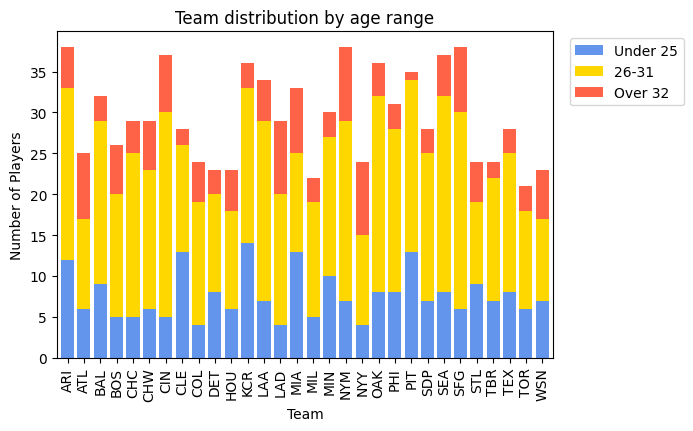

In [9]:
combined_counts = pd.DataFrame({
    'Under 25': team_counts,
    '26-31': team_counts1,
    'Over 32': team_counts2
}).fillna(0)

plt.figure(figsize=(20, 6))
bar_colors = ['cornflowerblue', 'gold', 'tomato' ]
combined_counts.plot(kind='bar', stacked=True, width=0.8, color=bar_colors)
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Team distribution by age range')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(bottom=0.2)
plt.show()

# Show the chart

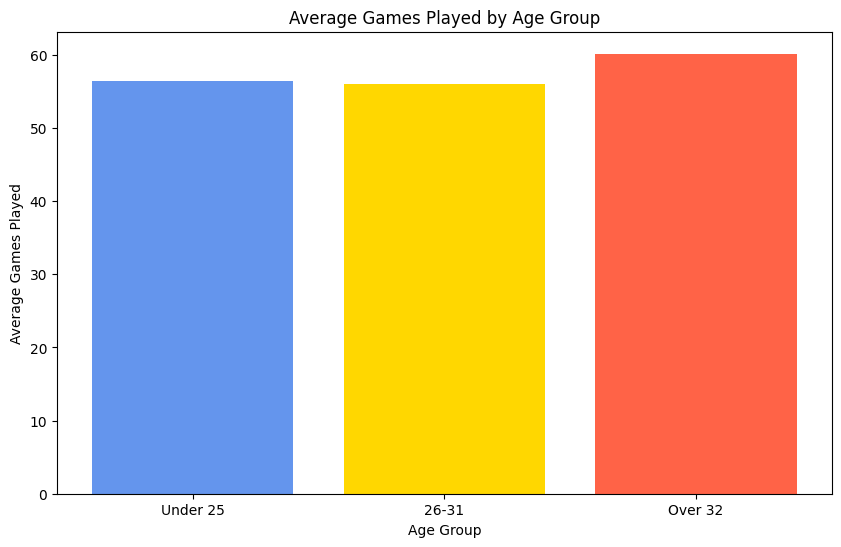

In [10]:
age_groups = ['Under 25', '26-31', 'Over 32']
average_games = [avg_games_under_25, avg_games_26_to_31, avg_games_over_32]
bar_colors1 = ['cornflowerblue', 'gold', 'tomato']
plt.figure(figsize=(10, 6))
plt.bar(age_groups, average_games, color= bar_colors1)
plt.xlabel('Age Group')
plt.ylabel('Average Games Played')
plt.title('Average Games Played by Age Group')
plt.show()

---
# There is any correlation between Strikeouts and HR/RBI?
- It is often observed that players who have more power and home run-hitting ability tend to have higher strikeout rates. When players try to hit the ball with more power, they may take bigger swings, increasing the likelihood of missing the ball and resulting in strikeouts.
- It's important to note that strikeouts can be influenced by various factors, including a ***player's approach at the plate, pitch recognition, plate discipline, and the pitching they face***
---
### There is not high correlation between this two variables, for better analysis will be useful to analyze swing and miss rates, contact percentages, and plate discipline metrics.

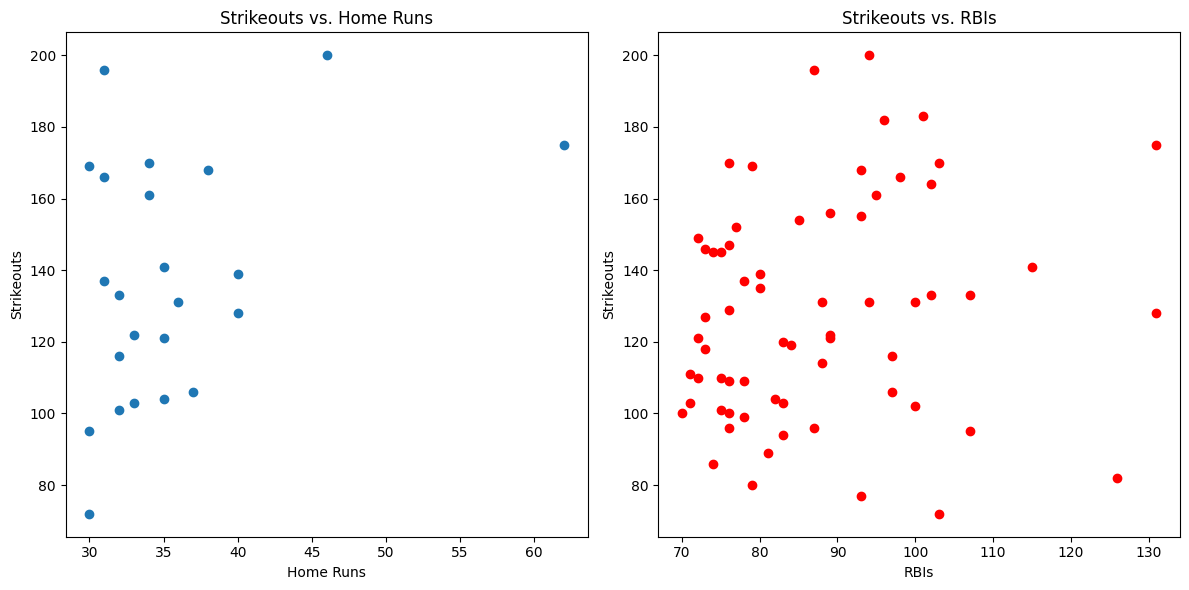

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for strikeouts vs. home runs
ax1.scatter(more_hr_players['hr'], more_hr_players['so'])
ax1.set_xlabel('Home Runs')
ax1.set_ylabel('Strikeouts')
ax1.set_title('Strikeouts vs. Home Runs')

# Scatter plot for strikeouts vs. RBIs
ax2.scatter(more_rbi_players['rbi'], more_rbi_players['so'], color= 'red')
ax2.set_xlabel('RBIs')
ax2.set_ylabel('Strikeouts')
ax2.set_title('Strikeouts vs. RBIs')

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined scatter plots
plt.show()

In [12]:
strikeout_rate = top5_hr_players['so'] / top5_hr_players['pa'] * 100
less_hr_strikeout_rate = less_hr_players['so'] / less_hr_players['pa'] * 100
less_rbi_strikeout_rate = less_rbi_players['so'] / less_rbi_players['pa'] * 100
average_strikeout_rate = strikeout_rate.mean()
average_less_hr_strikeout_rate = less_hr_strikeout_rate.mean()
average_ops = more_hr_players['ops'].mean()
strikeout_rate1 = more_rbi_players['so'] / more_rbi_players['pa'] * 100
average_strikeout_rate1 = strikeout_rate1.mean()
average_ops1 = more_rbi_players['ops'].mean()


print("Average Strikeout Rate for players with 30+ home runs:", average_strikeout_rate)
print("Average Strikeout Rate for players with less 30 home runs:", average_less_hr_strikeout_rate)
print("Average Strikeout Rate for players with 70+ RBIs:", average_strikeout_rate1)
print("Average OPS for players with 30+ home runs:", average_ops)
print("Average OPS for players with 70+ RBIs:", average_ops1)

Average Strikeout Rate for players with 30+ home runs: 25.16466228625739
Average Strikeout Rate for players with less 30 home runs: 26.98746415315644
Average Strikeout Rate for players with 70+ RBIs: 20.830665513246085
Average OPS for players with 30+ home runs: 0.8557391304347824
Average OPS for players with 70+ RBIs: 0.807876923076923


In [13]:
more_rbi_players = baseball_sp[baseball_sp['rbi'] >= 70]
less_rbi_players = baseball_sp[baseball_sp['rbi'] < 30]
count1 = len(more_rbi_players)
print(more_rbi_players[['name','rbi']])
print( count1)

                 name  rbi
3          José Abreu   75
5        Willy Adames   98
27        Pete Alonso  131
32     Yordan Alvarez   97
46      Nolan Arenado  103
..                ...  ...
827    Daulton Varsho   74
828     Andrew Vaughn   76
834      Alex Verdugo   74
850  Christian Walker   94
871        Bobby Witt   80

[65 rows x 2 columns]
65
